## 1. Paths

In [21]:
import os

## We begin our transfer learning by pulling a pre-trained model called mobilenet_v2, we chose this model because It is tailored for resource constrained environment, which is perferable since we will be hosting this on a laptop, it has low memory requirements and gives us High accuracy.


## We additionally have our labels set and identified as 'name:licence' and with an 'id:1' to identify what will be a considered a license plate. We then hour our generate tensor flow records, 'generate_tfrecord.py' of which 

In [1]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

## We have set our paths, here is a summary of all significant paths and their usage

## WORKSPACE_PATH: refers to where have our XML label files and our test and train images along with where we will be saving our pre-trained model

## SCRIPTS_PATH: refers to where we store a file called generate_tfrecords.py of which is used to convert our .XML data into tfrecords format which can be used for training purposes

## APIMODEL_PATH: refers to where we are access our tensorflow research models, of which we will be using the pre-trained object_detection model

## CHECKPOINT_PATH: refers to where we will save our model when we perform model checkpoints, and OUTPUT_PATH refers to where our saved trained model will be saved

## PROTOC_PATH: TensorFlow Object Detection API uses protobuf files to config the training & evaluation process

In [23]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

## we now setup the path for very important file in our program, our pipline config. We define our number of classes, which is soley 1, our feature extractor, where we set our convulation hyperparameters and our weights, etc... *need2know*, our activation which is set to SIGMOID. Our box predicitons for our object detection localization, etc....

In [24]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

## configuration for different OS types, including windows and mac, especially for our teammates on macbook

In [25]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 2. Download TensorFlow Models Pretrained Models from Tensorflow Model Zoo and Install Tensorflow object_detection. Tensorflow Model Zoo is the library of the pre-trained models.

## installing wget to work with our internet protocols such as HTTP and HTTPs

In [26]:
if os.name=='nt':
    !pip install wget
    import wget

# Now prepping to configure our object_detection from the tensorflow pre-trained models

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

## We begin installing Tensorflow Object_Detection using the protobuf compiler

In [8]:
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detecti

C:\Users\flurr\Desktop\ANPR\anprsys\lib\site-packages\setuptools\command\install.py:37: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  setuptools.SetuptoolsDeprecationWarning,
C:\Users\flurr\Desktop\ANPR\anprsys\lib\site-packages\setuptools\command\easy_install.py:147: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  EasyInstallDeprecationWarning,
C:\Users\flurr\Desktop\ANPR\anprsys\lib\site-packages\pkg_resources\__init__.py:125: PkgResourcesDeprecationWarning: otobuf is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils

byte-compiling build\bdist.win-amd64\egg\object_detection\utils\colab_utils.py to colab_utils.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\config_util.py to config_util.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\config_util_test.py to config_util_test.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\context_manager.py to context_manager.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\context_manager_test.py to context_manager_test.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\dataset_util.py to dataset_util.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\dataset_util_test.py to dataset_util_test.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\json_utils.py to json_utils.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\utils\json_utils_test.

Obtaining file:///C:/Users/flurr/Desktop/ANPR/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


# --- VERY IMPORTANT ---
## Refer to this section when having trouble running object detection. You NEED to ensure that the tensorflow object_detection model is working in order to run any code below this section

## in order to succesfully ensure we have installed our object_detection model correctly, we use a verifcation script, of which uses mode_builder_tf2_test.py. This is essentially a test to ensure everything is running succesfully for us to use our object detection on our license plates dataset. 

In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
!python {VERIFICATION_SCRIPT}

2022-04-06 10:35:03.824247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-06 10:35:03.824313: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-06 10:35:08.580077: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-06 10:35:08.580641: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-04-06 10:35:08.581153: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-04-06 10:35:08.581624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

# --- VERY IMPORTANT ---

## Below is the many, many dependencies required in order to run your object detection CONTINUE running your verification script until all dependencies are resolved and you recieve an OK (scroll down the verification script's log to see). Once we have an OK from our verification script, you have successfully installed tensorflow object detection!

## --- START of the process where we installed required dependencies we needed to install ---

In [10]:
!pip install tf-models-official

In [11]:
!pip install Pillow

In [12]:
!pip install tensorflow --upgrade

In [ ]:
!pip install pip install tensorflow-io

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [ ]:
!pip install scipy

In [ ]:
!pip install apache-beam
!pip install avro-python3
!pip install contextlib2
!pip install lvis
!pip install pandas
!pip install pillow
!pip install pycocotools
!pip install gin-config
!pip install google-api-python-client
!pip install kaggle
!pip install oauth2client
!pip install opencv-python-headless
!pip install py-cpuinfo
!pip install pyyaml
!pip install sacrebleu
!pip install sentencepiece
!pip install seqeval
!pip install tensorflow-addons
!pip install tensorflow-datasets
!pip install tensorflow-hub
!pip install tensorflow-model-optimization
!pip install tensorflow-text

## --- END of the process where we installed required dependencies we needed to install ---

## From here, we have offically installed tensorflow object_detection, and can now start our training our model in regards to our own licenes plate dataset, down below we start our transfer learning from our pre-trained model: mobilenet_V2

In [27]:
import object_detection

In [ ]:
!pip list

## downloading our mobilenet_v2 for transfer learning

In [14]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 3. Create Label Map

## As refered previously up top, we are now setting our labels. Our main label is 'licence' and our id as '1', which will be the numerical representation of our licence plate

In [28]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 4. Create TF records, as mentioned above, this will allow us to convert our .XML data to Tfrecords for faster training purposes - the architecture of a Tfrecords file is generally all the same, and can easily be cloned from a number of repos

In [30]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 5. Copying our Model Config to our Training Folder, we move the general pipline config structure to our detection model

In [19]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 6. Update Config For Transfer Learning

## Here we have started to perform our transfer learning process. Here, we will be updating the paths in our pipline config that was provided to us from our Mobilenet_V2.

In [20]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [21]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [22]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [23]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [24]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [25]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 7. Train the model

## We are now training our model we have made from transfer learning. We created a simple command that you can run in your cmd prompt (need to be in the correct environment) to start the training process

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [ ]:
print(command)

## Our model took ~2 hour and 20 minutes to train on an i7 CPU. We had around ~10000 steps, and worked with 433 images in our dataset. We had a 80:20 training-test ratio (including our images and their associcated XML lables). Due to time restrictions and techinical difficuilty we did not train on a GPU, of which would have been much faster.

In [ ]:
!{command}

# 8. Evaluate our new Model *need2know*

In [4]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

NameError: name 'TRAINING_SCRIPT' is not defined

In [ ]:
print(command)

In [ ]:
!{command}

# 9. Load Train Model From Checkpoint

## We import our required libraires from our object_detection to help us in our license plate detection. Such as 'label_map_util' which *need2know*

In [31]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

## here we are loading our pipeline config and building our detection model, note we have freezed our model with is_training=False in order to continue with our transfer learning.  We then procceed to restoring our checkpoint. *need2know*

## We created a funciton to perform our detections, this would make it easier to use our model and only needs to take in an image/frame. The function returns it's detections of which are pixel locations *need2know*

In [32]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 10. Detect from an Image

## We are now offically starting our object detection to detect a license plate. We are starting off by testing on simple static image. (Note: sometimes detection box is not drawn when working with static images, that doesn't mean a license plate wasn't detected, this is not an issue with live object detection)

In [ ]:
!pip install opencv-python

In [33]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## We are reading in our image using OpenCV. We are displaying our detection box, our associated detection_class, 'license', and the score/accuracy of our detection. We display using matplotlib and the result is posted below. *need2know*

In [34]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [35]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'picture.png')

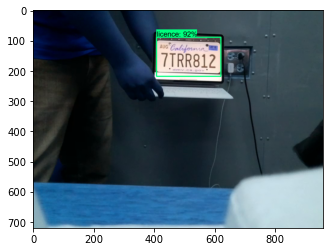

In [36]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

# Apply OCR to Detection

## Moving forward, we start applying OCR (object character recognition) to read the license plate number from our detected license. We do this by using easyOCR, a a Python package allows us to extract text from an image.

# --- IMPORTANT ---
## in order to successfully use easyOCR you need to make sure you are in openCV version 4.5.4, manually uninstall any other version, then proceed with installing v.4.5.4

In [38]:
!pip install easyocr

In [40]:
import easyocr

## Note: we also experimented with pytesseract, but after some experimentation concluded that it was not as reliable as easyOCR. We attempted to kerasAPI but had trouble configuring it, Google's Vision AI is also very acurate, but does require payment info.

In [19]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pytesseract

import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# --- IMPORTANT ---
## detection threshold plays a large role in the process of extracting text. .7 & .6 are the best numbers of which give you accurate results.

In [41]:
detection_threshold = 0.7

In [42]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [43]:
width = image.shape[1]
height = image.shape[0]

## Note: we also experimented with adding filters to possibly result in better accuracy such as gray scaling, fine edge detection, and switching some channels to elevate color range, but concluded that easyOCR is strong enough to detect accurate results without such pre-processing.

## We set region of interest filitering on our detected image to futher crop it down to the correct input that we want to pass to our easyOCR. We did this by simply *need2know* We then finally reach the point of where it is time to perform easyOCR. EasyOCR allows to select the lanugage you would like to work with while creating your reader, in our case, english, then we extract the text from our region using the reader we created. You can see the output below

## Note: the numbers below represent the *need2know*

[0.1257774  0.4253211  0.3028488  0.64793277]
[ 90.55972338 408.30825806 218.051126   622.01545715]
[([[9, 21], [43, 21], [43, 41], [9, 41]], 'AuG', 0.7388478511111857), ([[41, 18], [175, 18], [175, 57], [41, 57]], "'Cabkormia]", 0.10793177952590881), ([[5, 39], [208, 39], [208, 112], [5, 112]], '7TRR812', 0.8528515663488395), ([[126, 106], [148, 106], [148, 114], [126, 114]], '0O', 0.3302849800429434)]


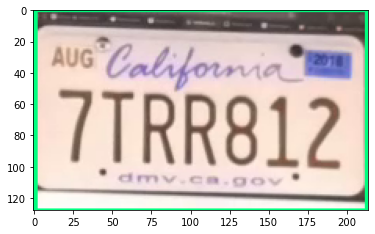

In [45]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

## Below you can see the output of all the text that was extracted when performing easyOCR. We further filter this text down to simply to the license plate number below.

In [46]:
for result in ocr_result:
    print(result[1])

AuG
'Cabkormia]
7TRR812
0O


# OCR Filtering

# --- IMPORTANT ---
## region threshold plays a large role in filerting the extracted text. .05 is the best working number to give produce accurate filtering

In [47]:
region_threshold = 0.05

## We defined a function to filter our text after we have extracted all text from our license plate. We do this by *need2know* 

In [2]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

## Here, you can see the final result of our OCR

In [49]:
filter_text(region, ocr_result, region_threshold)

["'Cabkormia]", '7TRR812']

# Bring it Together

## Finally, we bring everything listed above and aggregate into one function. We did this for the purpose of our live object detection and OCR.

In [50]:
region_threshold = 0.6

In [51]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

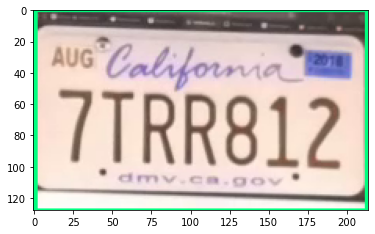

[]


In [52]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

## We also created a way to save into a CSV database, with the associated image .jpg filename. We imported and used uuid to give random names associated with each license plate, we created a function called save results does those two things, but with easier use of which you can see in your live object detection and OCR.

In [53]:
import csv
import uuid

In [54]:
'{}.jpg'.format(uuid.uuid1())

'fa747930-b9d9-11ec-b11d-d4548b0bace2.jpg'

In [55]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [57]:
save_results(text, region, 'detection_results.csv', 'Detection_Images')

# 10. Real Time Detections from your Webcam

## Now, we can finally start detecting license plates and extract text in real time. Note: you need to specifiy which port you are using, in cv2.VideoCapture(0), we specificy '0' because it is the port most commonly used for webcams, but depending on the camera you want to operate this could be different.

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
!pip install opencv-python --upgrade

In [ ]:
!pip install djitellopy

## For doing real time license plate detection and OCR on a webcam, we used opencv to capture our video and process each frame in that video through our detection model. Addtionally, we included a counter that would add a slight delay when a license plate is seen, so we are not constantlly check the same plate multiple times. We added a threshold which would only ensure we capture license plates that are > 85% accuracy. Our OCR function and Save function that were mentioned earlier are used within a try block to capture and save our detections and text in real time.

hi


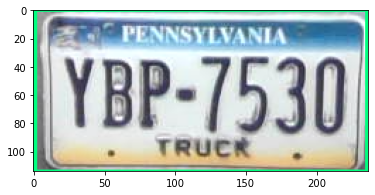

[]
hi


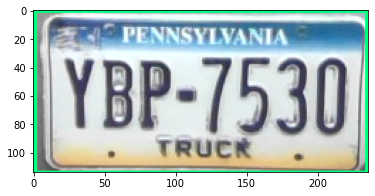

[]
hi


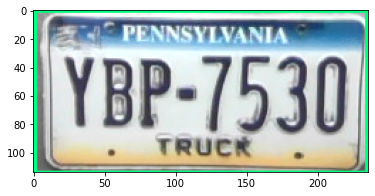

['YBP:7530 ']


In [59]:
# original real time
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
counter = 0

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False) 
    if counter < 3:
        if (detections['detection_scores'][0] > 0.85):
            try:
                print("hi")
                text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
                save_results(text, region, 'realtimeresults.csv', 'Detection_Images')
                #save_cropped(text,region)
                counter += 1
            except:
                pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [ ]:
!pip install av

In [ ]:
import cv2
from djitellopy import Tello

tello = Tello()
tello.connect()

tello.streamon()
frame_read = tello.get_frame_read()

tello.takeoff()
cv2.imwrite("picture.png", frame_read.frame)

tello.land()

## Our drone code is very similar to our live webcam code, aside from the fact that we are not using openCV to open our devices camera and access each frame, this is done through the means of the drone we used, the DJI tello's library. From the DJI tello's library, we opened the camera and feed in each frame we extracted from it's view to openCV.

In [ ]:
from djitellopy import Tello
import cv2
import time
 
######################################################################
width = 1280  # WIDTH OF THE IMAGE
height = 1280  # HEIGHT OF THE IMAGE
startCounter =0  #  0 FOR FIGHT 1 FOR TESTING
######################################################################
 
# CONNECT TO TELLO
me = Tello()
me.connect()
me.streamoff()
me.streamon()
movement = 0
me.for_back_velocity = 0
me.left_right_velocity = 0
me.up_down_velocity = 0
me.yaw_velocity = 0
me.speed = 0
counter = 0
downCounter = 0
print(me.get_battery())
while True:
 
    # GET THE IMGAE FROM TELLO
    frame_read = me.get_frame_read()
    myFrame = frame_read.frame
    img = cv2.resize(myFrame, (width, height))
    image_np = np.array(myFrame)
    


    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    if counter < 3:
        if (detections['detection_scores'][0] > 0.85):
            try: 
                text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
                #save_results(text, region, 'realtimeresults.csv', 'Detection_Images')\
                save_cropped(text,region)
                me.move_right()
                counter += 1
            except:
                pass

    if startCounter == 0:
        me.takeoff()
        startCounter = 1
        
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if movement < 1:
        #speed should be 30
        #lands ~24ft
        me.left_right_velocity = 30
        movement += 1
        if me.send_rc_control:
            me.send_rc_control(me.left_right_velocity, me.for_back_velocity, me.up_down_velocity, me.yaw_velocity)
    if downCounter == 0:
        print("hi")
        me.left_right_velocity = 0; me.for_back_velocity = 0;me.up_down_velocity = 0; me.yaw_velocity = 0
        downCounter = 1
        if me.send_rc_control:
            me.send_rc_control(me.left_right_velocity, me.for_back_velocity, me.up_down_velocity, me.yaw_velocity)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        #cap.release()
        #me.land()
        cv2.destroyAllWindows()
        break

In [ ]:
# test real time
cap = cv2.VideoCapture(0)
print(type(cap))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')